In [24]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

boston = load_boston()

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

In [6]:
df=pd.DataFrame(boston['data'])

In [8]:
df.columns=boston['feature_names']

In [9]:
Y=boston['target']
X=df

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=11)

In [11]:
#initiate linear regression model
model = LinearRegression()

#fit regression model
model.fit(X_train,y_train)

LinearRegression()

In [12]:
print(model.intercept_, model.coef_)

31.22646236482759 [-9.62677805e-02  4.58403839e-02  1.68589207e-02  3.59545656e+00
 -1.90173156e+01  4.24296126e+00  1.31751330e-02 -1.38036743e+00
  3.03024557e-01 -1.15420503e-02 -8.87520457e-01  1.08290708e-02
 -5.25212073e-01]


In [75]:
X_test_noconst=X_test[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
X_train_noconst=X_train[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

In [76]:
y_hat=model.predict(X_test_noconst)
y_hat_train=model.predict(X_train_noconst)
Ein = ((y_train-y_hat_train)**2).sum()/len(y_train)
Eout = ((y_test-y_hat)**2).sum()/len(y_test)

In [30]:
New_X_train = X_train[['const', 'CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

In [44]:
X_train = sm.add_constant(X_train)

In [45]:
X_test = sm.add_constant(X_test)

In [46]:
New_X_test = X_test[['const', 'CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

In [48]:
New_X_test

,const,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
53,1.0,0.04981,21.0,0.0,0.439,5.998,6.8147,4.0,243.0,16.8,396.90,8.43
490,1.0,0.20746,0.0,0.0,0.609,5.093,1.8226,4.0,711.0,20.1,318.43,29.68
240,1.0,0.11329,30.0,0.0,0.428,6.897,6.3361,6.0,300.0,16.6,391.25,11.38
375,1.0,19.60910,0.0,0.0,0.671,7.313,1.3163,24.0,666.0,20.2,396.90,13.44
417,1.0,25.94060,0.0,0.0,0.679,5.304,1.6475,24.0,666.0,20.2,127.36,26.64
...,...,...,...,...,...,...,...,...,...,...,...,...
285,1.0,0.01096,55.0,0.0,0.389,6.453,7.3073,1.0,300.0,15.3,394.72,8.23
7,1.0,0.14455,12.5,0.0,0.524,6.172,5.9505,5.0,311.0,15.2,396.90,19.15
247,1.0,0.19657,22.0,0.0,0.431,6.226,8.0555,7.0,330.0,19.1,376.14,10.15
357,1.0,3.84970,0.0,1.0,0.770,6.395,2.5052,24.0,666.0,20.2,391.34,13.27


In [47]:
New_X_train

,const,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
188,1.0,0.12579,45.0,0.0,0.437,6.556,4.5667,5.0,398.0,15.2,382.84,4.56
319,1.0,0.47547,0.0,0.0,0.544,6.113,4.0019,4.0,304.0,18.4,396.23,12.73
21,1.0,0.85204,0.0,0.0,0.538,5.965,4.0123,4.0,307.0,21.0,392.53,13.83
14,1.0,0.63796,0.0,0.0,0.538,6.096,4.4619,4.0,307.0,21.0,380.02,10.26
369,1.0,5.66998,0.0,1.0,0.631,6.683,1.3567,24.0,666.0,20.2,375.33,3.73
...,...,...,...,...,...,...,...,...,...,...,...,...
337,1.0,0.03041,0.0,0.0,0.515,5.895,5.6150,5.0,224.0,20.2,394.81,10.56
91,1.0,0.03932,0.0,0.0,0.489,6.405,3.0921,2.0,270.0,17.8,393.55,8.20
80,1.0,0.04113,25.0,0.0,0.426,6.727,5.4007,4.0,281.0,19.0,396.90,5.29
191,1.0,0.06911,45.0,0.0,0.437,6.739,6.4798,5.0,398.0,15.2,389.71,4.69


In [49]:
model2 = sm.OLS(y_train,X_train).fit()

In [50]:
model3 = sm.OLS(y_train,New_X_train).fit()

In [51]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     107.3
Date:                Fri, 02 Sep 2022   Prob (F-statistic):          7.13e-111
Time:                        21:44:43   Log-Likelihood:                -1187.7
No. Observations:                 404   AIC:                             2399.
Df Residuals:                     392   BIC:                             2447.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.6211      5.662      5.408      0.0

In [52]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     90.55
Date:                Fri, 02 Sep 2022   Prob (F-statistic):          5.05e-109
Time:                        21:44:48   Log-Likelihood:                -1187.3
No. Observations:                 404   AIC:                             2403.
Df Residuals:                     390   BIC:                             2459.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.2265      5.709      5.470      0.0

In [59]:
y_hat=model3.predict(New_X_test)
y_hat_train=model3.predict(New_X_train)

Ein3 = ((y_train-y_hat_train)**2).sum()/len(y_train)
Eout3 = ((y_test-y_hat)**2).sum()/len(y_test)

In [60]:
Ein3

20.94351290180218

In [62]:
Eout3

26.616115506571113

In [77]:
Ein

20.89839548405952

In [78]:
Eout

26.94481224951836

In [55]:
X_test

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
53,1.0,0.04981,21.0,5.64,0.0,0.439,5.998,21.4,6.8147,4.0,243.0,16.8,396.90,8.43
490,1.0,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68
240,1.0,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38
375,1.0,19.60910,0.0,18.10,0.0,0.671,7.313,97.9,1.3163,24.0,666.0,20.2,396.90,13.44
417,1.0,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,1.0,0.01096,55.0,2.25,0.0,0.389,6.453,31.9,7.3073,1.0,300.0,15.3,394.72,8.23
7,1.0,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
247,1.0,0.19657,22.0,5.86,0.0,0.431,6.226,79.2,8.0555,7.0,330.0,19.1,376.14,10.15
357,1.0,3.84970,0.0,18.10,1.0,0.770,6.395,91.0,2.5052,24.0,666.0,20.2,391.34,13.27


In [81]:
X_train.describe()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.0,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,1.0,3.523429,11.310644,11.055248,0.069307,0.550819,6.27404,67.690842,3.856292,9.462871,404.948020,18.461881,358.057079,12.514158
std,0.0,8.703673,23.377964,6.800412,0.254290,0.115445,0.69354,28.087409,2.123878,8.681066,167.947779,2.130432,89.364772,7.080678
min,1.0,0.006320,0.000000,0.460000,0.000000,0.385000,3.86300,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,1.0,0.079980,0.000000,5.190000,0.000000,0.448000,5.88300,43.250000,2.124125,4.000000,279.000000,17.400000,375.997500,6.907500
50%,1.0,0.229480,0.000000,9.125000,0.000000,0.524000,6.19850,76.250000,3.346000,5.000000,330.000000,18.950000,392.010000,11.310000
75%,1.0,3.543427,12.500000,18.100000,0.000000,0.624000,6.62050,93.375000,5.234500,24.000000,666.000000,20.200000,396.157500,16.447500
max,1.0,88.976200,95.000000,27.740000,1.000000,0.871000,8.72500,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [84]:
X_train['CRIM']

188     0.12579
319     0.47547
21      0.85204
14      0.63796
369     5.66998
         ...   
337     0.03041
91      0.03932
80      0.04113
191     0.06911
409    14.43830
Name: CRIM, Length: 404, dtype: float64

<AxesSubplot:xlabel='CRIM'>

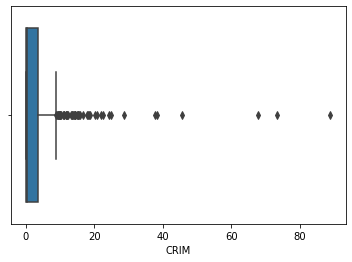

In [85]:
import seaborn as sns
sns.boxplot(x=X_train['CRIM'])

<AxesSubplot:xlabel='CRIM', ylabel='Count'>

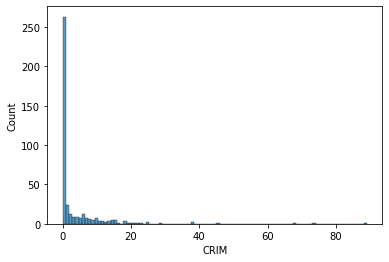

In [87]:
sns.histplot(x=X_train['CRIM'])

In [88]:
X_train[X_train['CRIM']>60]

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
418,1.0,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62
405,1.0,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98
380,1.0,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21


In [90]:
X_train.describe()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.0,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,1.0,3.523429,11.310644,11.055248,0.069307,0.550819,6.27404,67.690842,3.856292,9.462871,404.948020,18.461881,358.057079,12.514158
std,0.0,8.703673,23.377964,6.800412,0.254290,0.115445,0.69354,28.087409,2.123878,8.681066,167.947779,2.130432,89.364772,7.080678
min,1.0,0.006320,0.000000,0.460000,0.000000,0.385000,3.86300,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,1.0,0.079980,0.000000,5.190000,0.000000,0.448000,5.88300,43.250000,2.124125,4.000000,279.000000,17.400000,375.997500,6.907500
50%,1.0,0.229480,0.000000,9.125000,0.000000,0.524000,6.19850,76.250000,3.346000,5.000000,330.000000,18.950000,392.010000,11.310000
75%,1.0,3.543427,12.500000,18.100000,0.000000,0.624000,6.62050,93.375000,5.234500,24.000000,666.000000,20.200000,396.157500,16.447500
max,1.0,88.976200,95.000000,27.740000,1.000000,0.871000,8.72500,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [97]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [96]:
df[['CRIM','B']].corr()

,CRIM,B
CRIM,1.000000,-0.385064
B,-0.385064,1.000000


/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CRIM', ylabel='B'>

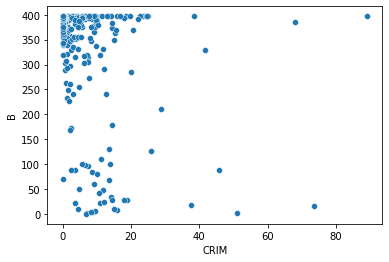

In [95]:
sns.scatterplot(df['CRIM'],df['B'])

In [ ]:
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior t
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

In [99]:
X_train.columns

Index(['const', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [117]:
norad_train=X_train[['const',  'ZN', 'CHAS', 'NOX', 'RM','DIS',
        'PTRATIO', 'B', 'LSTAT']]
norad_test=X_test[['const', 'ZN',  'CHAS', 'NOX', 'RM', 'DIS',
        'PTRATIO', 'B', 'LSTAT']]

In [118]:
model4 = sm.OLS(y_train,norad_train).fit()

In [119]:
y_hat=model4.predict(norad_test)
y_hat_train=model4.predict(norad_train)

Einnorad = ((y_train-y_hat_train)**2).sum()/len(y_train)
Eoutnorad = ((y_test-y_hat)**2).sum()/len(y_test)

In [120]:
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     139.3
Date:                Fri, 02 Sep 2022   Prob (F-statistic):          5.49e-110
Time:                        23:16:03   Log-Likelihood:                -1197.4
No. Observations:                 404   AIC:                             2413.
Df Residuals:                     395   BIC:                             2449.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.6179      5.437      4.528      0.0

In [121]:
Eoutnorad

28.266669798948865

In [122]:
Einnorad

21.976150640413728

In [123]:
Eoutnorad-Einnorad

6.290519158535137